In [1]:
# Importaing some libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, k_means
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Loading the dataset
from sklearn.datasets import fetch_openml
# Importing the minst dataset
df1 = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = df1["data"]
y = df1["target"].astype(np.uint8)

In [3]:
# printing the data set
print(df1.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [4]:
# shape of the dataset
print("Shape of the dataset: ", X.shape)
print("Shape of the target: ", y.shape)

Shape of the dataset:  (70000, 784)
Shape of the target:  (70000,)


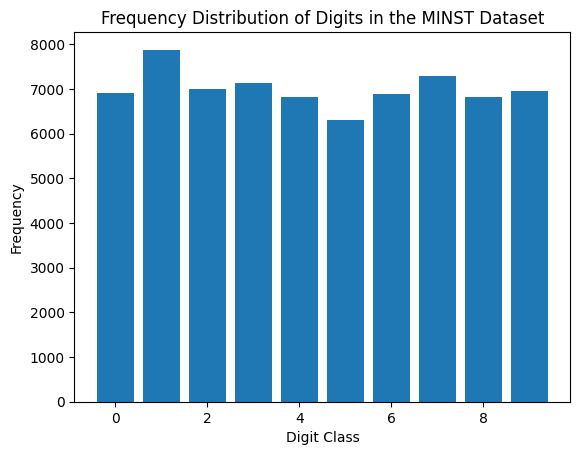

In [5]:
# Plot the frequency distribution of each digit class
unique, counts = np.unique(y, return_counts=True)
plt.bar(unique, counts)
plt.title("Frequency Distribution of Digits in the MINST Dataset")
plt.xlabel("Digit Class")
plt.ylabel("Frequency")
plt.show()

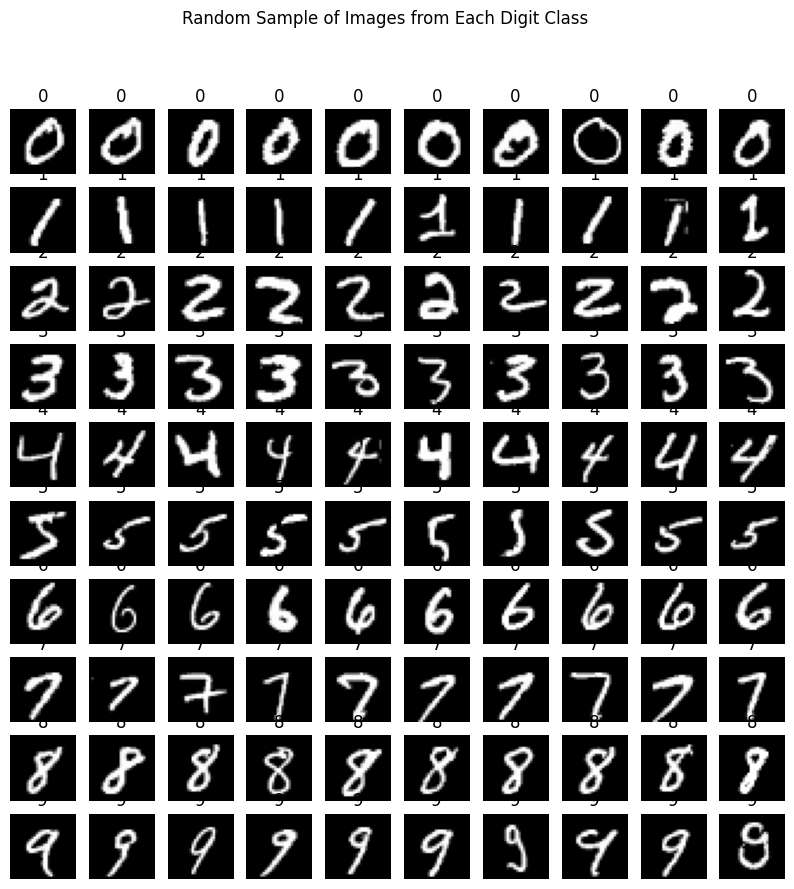

In [6]:
# Plot a random sample of images from each digit class
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
    for j in range(10):
        idx = np.where(y == i)[0][j]
        img = X[idx].reshape(28, 28)
        axes[i, j].imshow(img, cmap="gray")
        axes[i, j].axis("off")
        axes[i, j].set_title(str(i))
plt.suptitle("Random Sample of Images from Each Digit Class")
plt.show()

In [7]:
# Apply PCA to reduce the dimensionality of the data
# pca = PCA(n_components=2)
# X_reduced = pca.fit_transform(X)

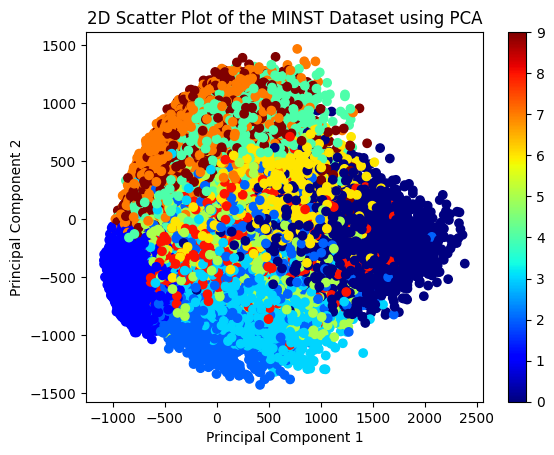

In [8]:
# # Plot the reduced data in a 2D scatter plot
# plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
# plt.title("2D Scatter Plot of the MINST Dataset using PCA")
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# plt.colorbar()
# plt.show()

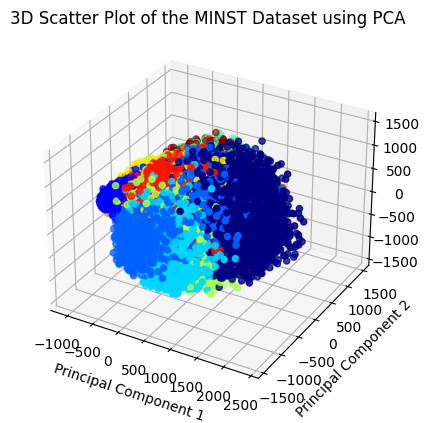

In [9]:
# # plot the data in 3d scatter plot
# pca = PCA(n_components=3)
# X_reduced = pca.fit_transform(X)
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y, cmap="jet")
# plt.title("3D Scatter Plot of the MINST Dataset using PCA")
# plt.xlabel("Principal Component 1") 
# plt.ylabel("Principal Component 2")
# plt.show()

In [10]:
# # Apply t-SNE to reduce the dimensionality of the data
# tsne = TSNE(n_components=2, random_state=42)
# X_reduced = tsne.fit_transform(X)

In [11]:
# printing the tsne data 
# print(X_reduced)

[[ 33.27073    -1.5237485]
 [ 69.01344   -37.916355 ]
 [ 35.09033    85.61363  ]
 ...
 [ 13.208819   47.15851  ]
 [ 17.333715   22.926247 ]
 [ 63.954517   34.662334 ]]


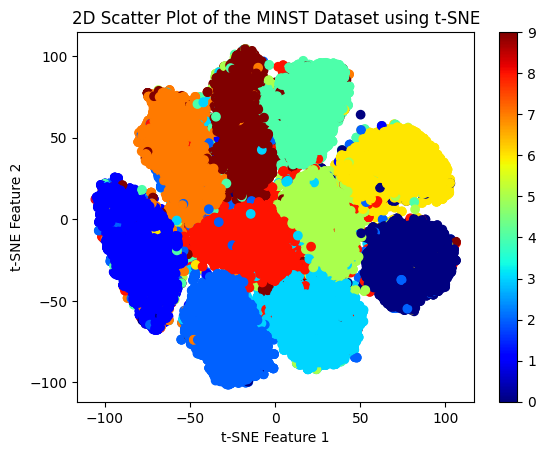

In [12]:
# Plot the reduced data in a 2D scatter plot
# plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
# plt.title("2D Scatter Plot of the MINST Dataset using t-SNE")
# plt.xlabel("t-SNE Feature 1")
# plt.ylabel("t-SNE Feature 2")
# plt.colorbar()
# plt.show()

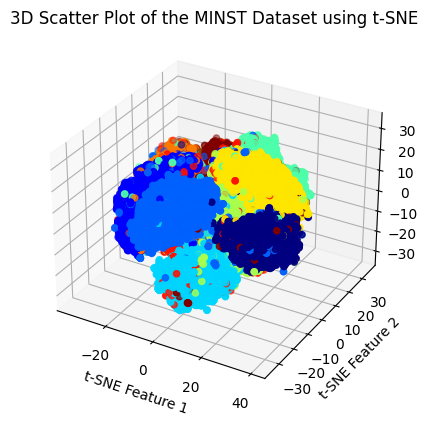

In [13]:
# plot the data in 3d scatter plot
# tsne = TSNE(n_components=3, random_state=42)    
# X_reduced = tsne.fit_transform(X)
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y, cmap="jet")
# plt.title("3D Scatter Plot of the MINST Dataset using t-SNE")
# plt.xlabel("t-SNE Feature 1")
# plt.ylabel("t-SNE Feature 2")
# plt.show()

In [14]:
df1.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [15]:
# feature names of the dataset
print("Feature names: ", df1.feature_names)

Feature names:  ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90', 'p

In [16]:
# Now using this features names in x and y shape columns and creating a dataframe
df = pd.DataFrame(X, columns=df1.feature_names)
df["target"] = y
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [17]:
# now checking the statistical values of the dataset
df.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0,4.452429
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0,2.890195
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0,9.000000


In [18]:
# checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to target
dtypes: float64(784), uint8(1)
memory usage: 418.8 MB


In [19]:
# shape of the dataset
df.shape

(70000, 785)

In [20]:
# how many unique values are there in the dataset
df.nunique()

pixel1       1
pixel2       1
pixel3       1
pixel4       1
pixel5       1
            ..
pixel781     1
pixel782     1
pixel783     1
pixel784     1
target      10
Length: 785, dtype: int64

### Some examples of columns values in the dataset

In [21]:
# checking the values of the pixel columns
df.groupby("pixel1")["pixel1"].agg("count")

pixel1
0.0    70000
Name: pixel1, dtype: int64

In [22]:
df.groupby("pixel2")["pixel2"].agg("count")

pixel2
0.0    70000
Name: pixel2, dtype: int64

In [23]:
df.groupby("pixel3")["pixel3"].agg("count")

pixel3
0.0    70000
Name: pixel3, dtype: int64

In [24]:
df.groupby("pixel4")["pixel4"].agg("count")

pixel4
0.0    70000
Name: pixel4, dtype: int64

In [25]:
# gaining the information about the target column by using groupby function
df.groupby("target").size()

target
0    6903
1    7877
2    6990
3    7141
4    6824
5    6313
6    6876
7    7293
8    6825
9    6958
dtype: int64

# data cleaning and preprocessing

In [26]:
# checking the null values in the dataset
df.isnull().sum()

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel781    0
pixel782    0
pixel783    0
pixel784    0
target      0
Length: 785, dtype: int64

In [27]:
# checking the null values in the dataset
df.isna().any().any()

False

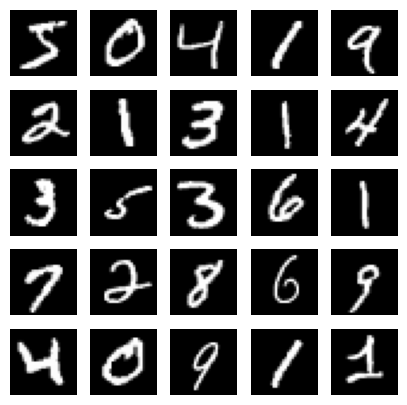

In [29]:
# visualizaing some digits from the dataset
plt.figure(figsize=(5, 5))
for i in range(25):
      plt.subplot(5, 5, i+1)
      plt.imshow(X[i].reshape(28, 28), cmap="gray")
      plt.axis("off")
plt.show()

### Using the box plot to detect outliers in the dataset here is some examples

<Axes: xlabel='pixel1'>

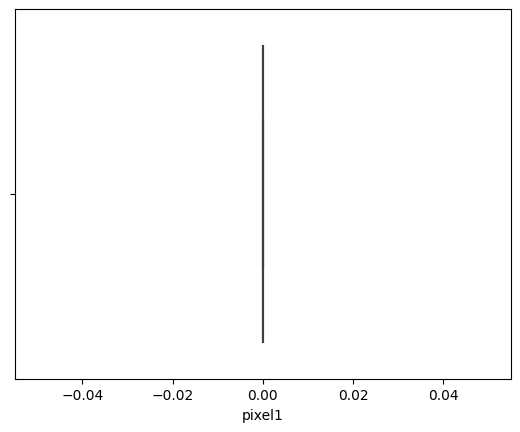

In [30]:
sns.boxplot(x=df["pixel1"])

<Axes: xlabel='pixel2'>

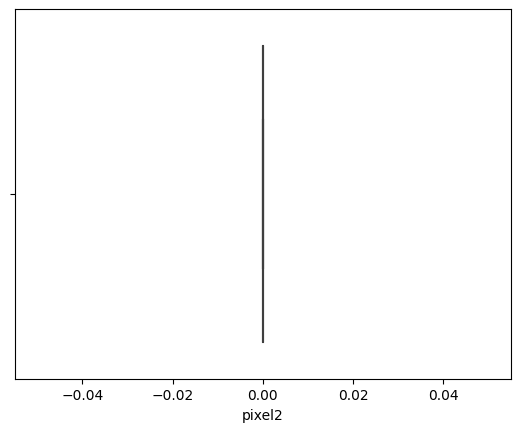

In [31]:
sns.boxplot(x=df['pixel2'])

<Axes: xlabel='target'>

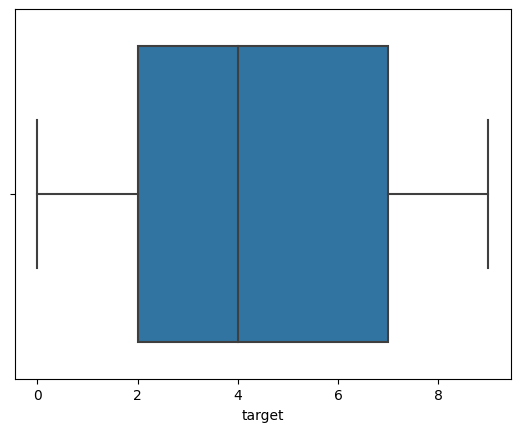

In [32]:
sns.boxplot(x=df['target'])

#### After checking the box plot we can see that there is no outliers in the dataset

In [33]:
# now implementing the clustering algorithm
# first we need to scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


In [34]:
# Print the mean and standard deviation of the normalized pixel values
print("Mean of normalized pixel values:", np.mean(X_scaled))
print("Standard deviation of normalized pixel values:", np.std(X_scaled))

Mean of normalized pixel values: -1.2214352469499375e-18
Standard deviation of normalized pixel values: 0.9577042613611463


In [35]:
# print the shape of the scaled data
print("Shape of the scaled data: ", X_scaled.shape)

Shape of the scaled data:  (70000, 785)


In [36]:
# now implementing the PCA algorithm
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

Shape of the pca data:  (70000, 2)


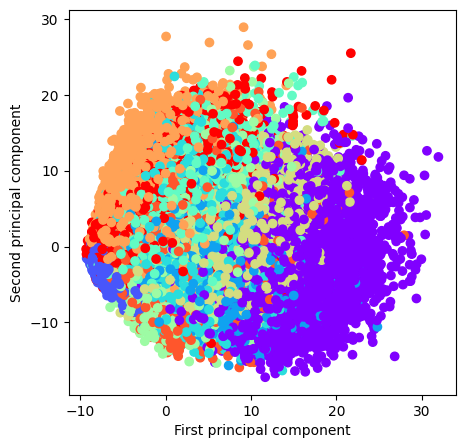

In [38]:
# print the shape of the pca data
print("Shape of the pca data: ", X_pca.shape)
# plotting the pca data
plt.figure(figsize=(5, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["target"], cmap="rainbow")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

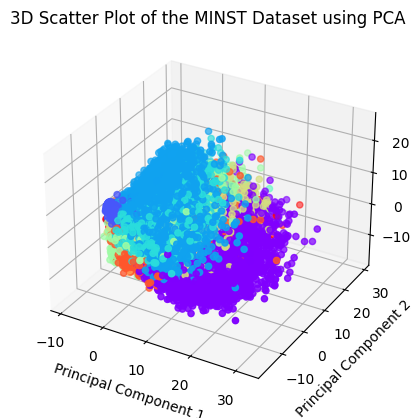

In [39]:
# ploting the pca data in 3d
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=df["target"], cmap="rainbow")
plt.title("3D Scatter Plot of the MINST Dataset using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

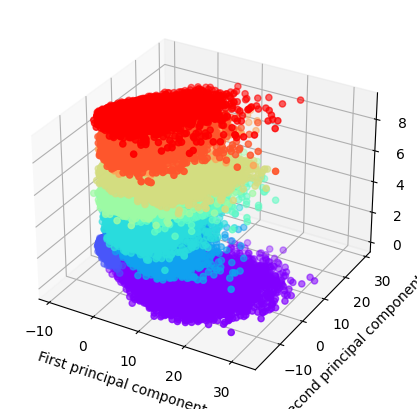

In [40]:
# ploting the 3d plot with pca data
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_pca[:, 0], X_pca[:, 1], df["target"], c=df["target"], cmap="rainbow")
ax.set_xlabel("First principal component")
ax.set_ylabel("Second principal component")
ax.set_zlabel("Target")
plt.show()

In [41]:
# implemenening the tsne algorithm
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

In [42]:
# print the shape of the tsne data
print("Shape of the tsne data: ", X_tsne.shape)

Shape of the tsne data:  (70000, 2)


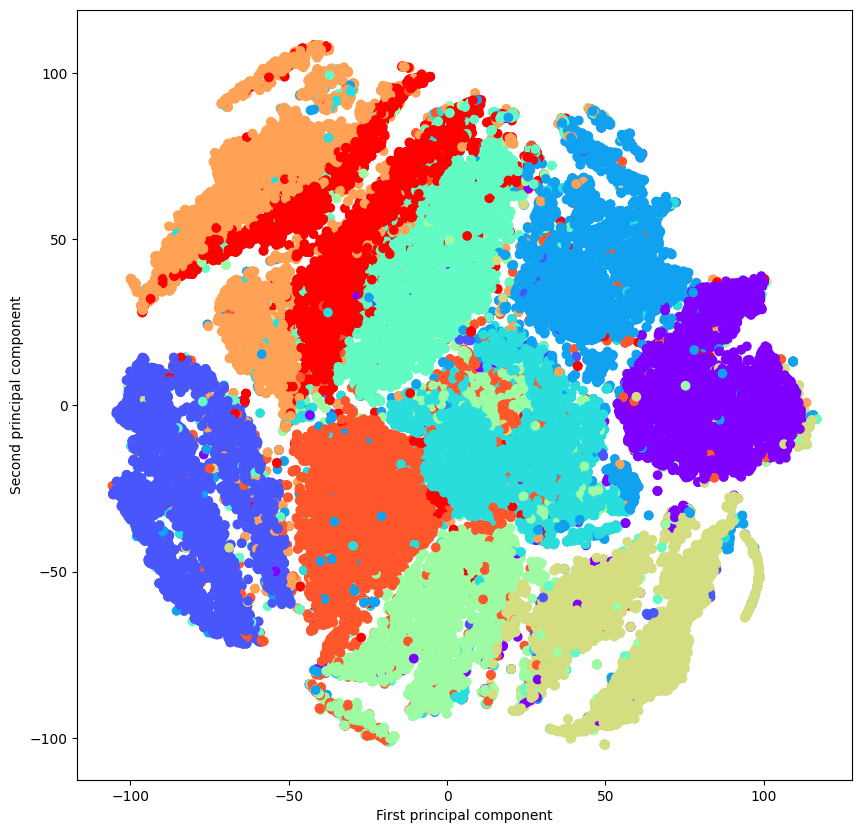

In [43]:
# plotting the tsne data
plt.figure(figsize=(10, 10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df["target"], cmap="rainbow")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

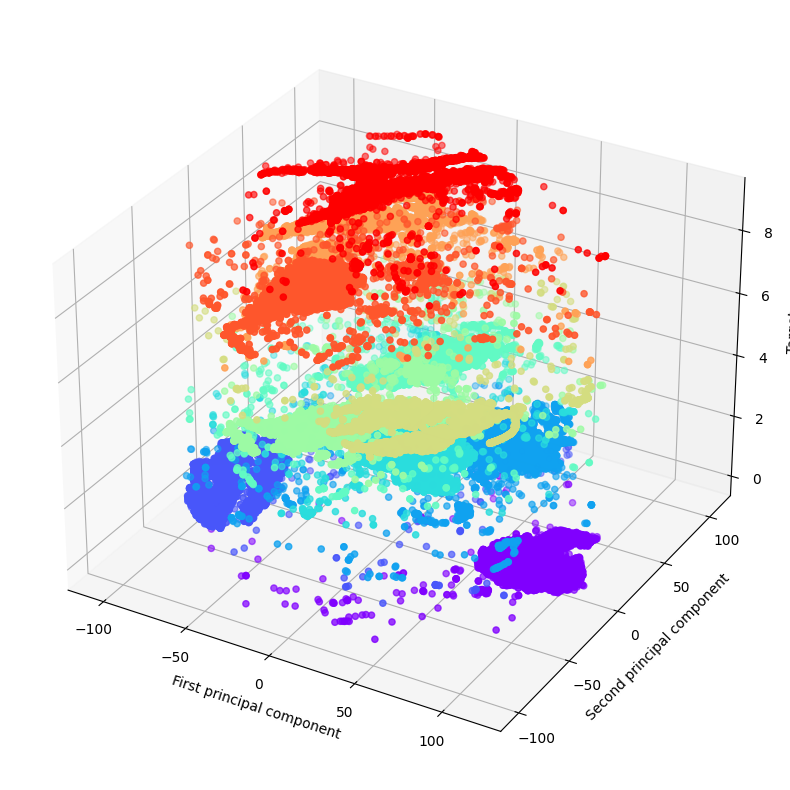

In [44]:
# Ploting the 3 dd plots
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], df["target"], c=df["target"], cmap="rainbow")
ax.set_xlabel("First principal component")
ax.set_ylabel("Second principal component")
ax.set_zlabel("Target")
plt.show()

In [45]:
# first we need to split the data into train and test
# for speed up the model training we are using only 1000 data points
X_train, X_test, y_train, y_test = train_test_split(X_scaled[:1000], df["target"][:1000], test_size=0.2, random_state=42)

In [46]:
# print the shape of the train and test data
print("Shape of the train data: ", X_train.shape)
print("Shape of the test data: ", X_test.shape)
print("Shape of the train target: ", y_train.shape)
print("Shape of the test target: ", y_test.shape)

Shape of the train data:  (800, 785)
Shape of the test data:  (200, 785)
Shape of the train target:  (800,)
Shape of the test target:  (200,)


## Preparing a dataframe for the model analysis

In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [48]:
models_e = pd.DataFrame(index=["RMSE", "MAE"], columns=['RANDOM_F','KNN','SVM','LOGISTIC_REGRESSION'])
models_r = pd.DataFrame(index=["Accuracy score","R2"], columns=['RANDOM_F','KNN','SVM','LOGISTIC_REGRESSION'])

In [49]:
# print the models_e dataframe
models_e

,RANDOM_F,KNN,SVM,LOGISTIC_REGRESSION
RMSE,NaN,NaN,NaN,NaN
MAE,NaN,NaN,NaN,NaN


In [50]:
# print the models_r dataframe
models_r

,RANDOM_F,KNN,SVM,LOGISTIC_REGRESSION
Accuracy score,NaN,NaN,NaN,NaN
R2,NaN,NaN,NaN,NaN


In [52]:
# importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [53]:
# random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [54]:
# evaluating the model
models_e.loc['RMSE','RANDOM_F'] = mean_squared_error(y_pred=rfc.predict(X_test),y_true=y_test,squared=False)
models_e.loc['MAE','RANDOM_F'] = mean_absolute_error(y_pred=rfc.predict(X_test),y_true=y_test)
models_r.loc['R2','RANDOM_F'] = r2_score(y_pred=rfc.predict(X_test),y_true=y_test)
models_r.loc['Accuracy score','RANDOM_F'] = rfc.score(X_test,y_test)

In [55]:
models_e

,RANDOM_F,KNN,SVM,LOGISTIC_REGRESSION
RMSE,1.369306,NaN,NaN,NaN
MAE,18.895,NaN,NaN,NaN


In [56]:
models_r

,RANDOM_F,KNN,SVM,LOGISTIC_REGRESSION
Accuracy score,0.92,NaN,NaN,NaN
R2,0.768378,NaN,NaN,NaN


In [57]:
# predicting the values
y_pred = rfc.predict(X_test)

In [58]:
#presicion and recall score of random forest classifier
from sklearn.metrics import precision_score, recall_score
print("Precision score: ", precision_score(y_test, y_pred, average="macro"))
print("Recall score: ", recall_score(y_test, y_pred, average="macro"))


Precision score:  0.920128002521999
Recall score:  0.9200576852814706


In [59]:
# print the accuracy score
print("Accuracy score: ", accuracy_score(y_test, y_pred))

Accuracy score:  0.92


In [60]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [61]:
# predicting the values
y_pred = lr.predict(X_test)

In [62]:
#precision and recall of logistic regression
from sklearn.metrics import precision_score, recall_score
print("Precision score: ", precision_score(y_test, y_pred, average="macro"))
print("Recall score: ", recall_score(y_test, y_pred, average="macro"))


Precision score:  0.8999473684210526
Recall score:  0.9000988546832538


In [63]:
# evaluating the model
models_e.loc['RMSE','LOGISTIC_REGRESSION'] = mean_squared_error(y_pred=lr.predict(X_test),y_true=y_test,squared=False)
models_e.loc['MAE','LOGISTIC_REGRESSION'] = mean_absolute_error(y_pred=lr.predict(X_test),y_true=y_test)
models_r.loc['R2','LOGISTIC_REGRESSION'] = r2_score(y_pred=lr.predict(X_test),y_true=y_test)
models_r.loc['Accuracy score','LOGISTIC_REGRESSION'] = rfc.score(X_test,y_test)

In [64]:
# print the accuracy score 
print("Accuracy score: ", accuracy_score(y_test, y_pred))

Accuracy score:  0.895


In [65]:
# print the rmse score
print("RMSE score: ", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE score:  1.40356688476182


In [66]:
models_e

,RANDOM_F,KNN,SVM,LOGISTIC_REGRESSION
RMSE,1.369306,NaN,NaN,1.403567
MAE,18.895,NaN,NaN,21.48


In [67]:
models_r

,RANDOM_F,KNN,SVM,LOGISTIC_REGRESSION
Accuracy score,0.92,NaN,NaN,0.92
R2,0.768378,NaN,NaN,0.756643


In [68]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [69]:
# predicting the values
y_pred = knn.predict(X_test)

In [70]:
#precision and reclall of knn
from sklearn.metrics import precision_score, recall_score
print("Precision score: ", precision_score(y_test, y_pred, average="macro"))
print("Recall score: ", recall_score(y_test, y_pred, average="macro"))


Precision score:  0.8078114738718455
Recall score:  0.803034853041247


In [71]:
# evaluating the model
models_e.loc['RMSE','KNN'] = mean_squared_error(y_pred=knn.predict(X_test),y_true=y_test,squared=False)
models_e.loc['MAE','KNN'] = mean_absolute_error(y_pred=knn.predict(X_test),y_true=y_test)
models_r.loc['R2','KNN'] = r2_score(y_pred=knn.predict(X_test),y_true=y_test)
models_r.loc['Accuracy score','KNN'] = knn.score(X_test,y_test)

In [72]:
# print the accuracy score
print("Accuracy score: ", accuracy_score(y_test, y_pred))

Accuracy score:  0.795


In [73]:
models_r

,RANDOM_F,KNN,SVM,LOGISTIC_REGRESSION
Accuracy score,0.92,0.795,NaN,0.92
R2,0.768378,0.513903,NaN,0.756643


In [74]:
# print the rmse score
print("RMSE score: ", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE score:  1.9836834424877372


In [75]:
# SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [76]:
# predicting the values
y_pred = svm.predict(X_test)

In [77]:
# evaluating the model
models_e.loc['RMSE','SVM'] = mean_squared_error(y_pred=svm.predict(X_test),y_true=y_test,squared=False)
models_e.loc['MAE','SVM'] = mean_absolute_error(y_pred=svm.predict(X_test),y_true=y_test)
models_r.loc['R2','SVM'] = r2_score(y_pred=svm.predict(X_test),y_true=y_test)
models_r.loc['Accuracy score','SVM'] = svm.score(X_test,y_test)

In [78]:
# print the accuracy score
print("Accuracy score: ", accuracy_score(y_test, y_pred))

Accuracy score:  0.865


In [79]:
#presion and recall of svm

print("Precision score: ", precision_score(y_test, y_pred, average="macro"))
print("Recall score: ", recall_score(y_test, y_pred, average="macro"))


Precision score:  0.8721466434957483
Recall score:  0.8661342171087762


In [80]:
models_r

,RANDOM_F,KNN,SVM,LOGISTIC_REGRESSION
Accuracy score,0.92,0.795,0.865,0.92
R2,0.768378,0.513903,0.689936,0.756643


In [81]:
models_e

,RANDOM_F,KNN,SVM,LOGISTIC_REGRESSION
RMSE,1.369306,1.983683,1.584298,1.403567
MAE,18.895,37.955,24.07,21.48


In [82]:
# print the rmse score
print("RMSE score: ", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE score:  1.5842979517754858


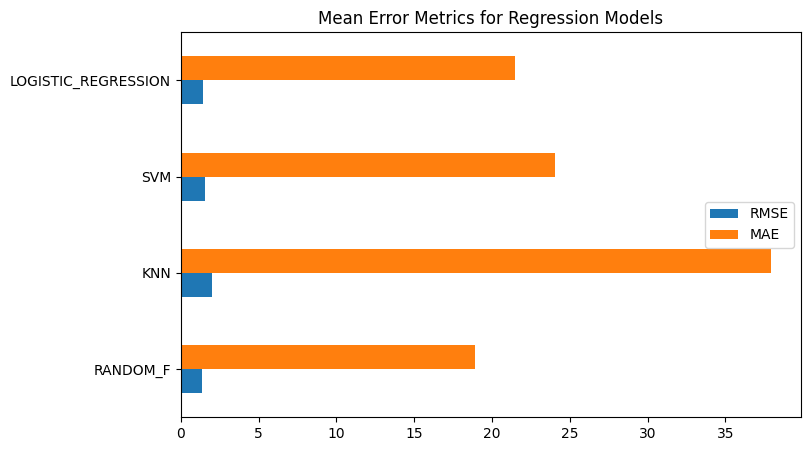

In [83]:
# plot the model evaluation metrics
fig, ax = plt.subplots(figsize=(8,5))
models_e.T.plot(kind='barh',ax=ax)
ax.set_title('Mean Error Metrics for Regression Models')
ax.legend(loc=5);

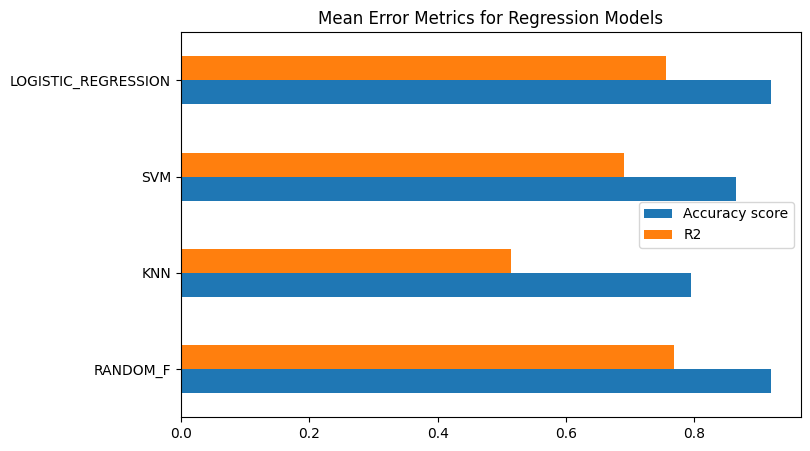

In [84]:
# plot the model evaluation metrics for r 2 score and accuracy score
fig, ax = plt.subplots(figsize=(8,5))
models_r.T.plot(kind='barh',ax=ax)
ax.set_title('Mean Error Metrics for Regression Models')
ax.legend(loc=5);

### comparing the model with kfold cross validation

In [85]:
# creating a data frame for cross validation scores
models_score_val = pd.DataFrame(index=["SCORE"], columns=['RANDOM_F','KNN','SVM','LOGISTIC_REGRESSION'])

In [86]:
models_score_val

,RANDOM_F,KNN,SVM,LOGISTIC_REGRESSION
SCORE,NaN,NaN,NaN,NaN


In [87]:
# Random Forest with k-fold cross validation and evaluation score
Random_F = cross_val_score(estimator=rfc, X=X_train, y=y_train, cv=10).mean()
models_score_val.loc['SCORE','RANDOM_F'] = Random_F

In [88]:
models_score_val

,RANDOM_F,KNN,SVM,LOGISTIC_REGRESSION
SCORE,0.9175,NaN,NaN,NaN


In [89]:
# KNN with k-fold cross validation and evaluation score
knn = cross_val_score(estimator=knn, X=X_train, y=y_train, cv=10).mean()
models_score_val.loc['SCORE','KNN'] = knn

In [90]:
# SVM with k-fold cross validation and evaluation score
svm = cross_val_score(estimator=svm, X=X_train, y=y_train, cv=10).mean()
models_score_val.loc['SCORE','SVM'] = svm 

In [91]:
# Logistic Regression with k-fold cross validation and evaluation score
lr = cross_val_score(estimator=lr, X=X_train, y=y_train, cv=10).mean()
models_score_val.loc['SCORE','LOGISTIC_REGRESSION'] = lr

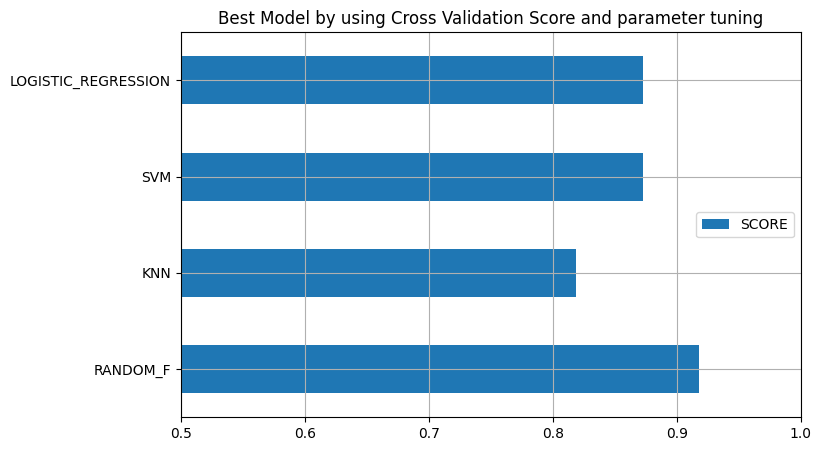

In [92]:
# ploting the cross validation scores
fig, ax = plt.subplots(figsize=(8,5))
models_score_val.T.plot(kind='barh',ax=ax)
ax.set_title('Best Model by using Cross Validation Score and parameter tuning')
ax.legend(loc=5);
ax.set_xlim(0.5,1);
ax.grid();

In [93]:
# precision and recall of logistic regression with cross validation
from sklearn.metrics import precision_score, recall_score
print("Precision score: ", precision_score(y_test, y_pred, average="macro"))
print("Recall score: ", recall_score(y_test, y_pred, average="macro"))



Precision score:  0.8721466434957483
Recall score:  0.8661342171087762


#### I am very satisfied with the result of the model and i enjoy the whole work of the project and when i see the result of the model i am very happy and i am very proud of myself.. Hope you will enjoy the project and i will be happy to hear your feedback.